## Importing libs

In [32]:
import pandas as pd
import os
from tqdm import tqdm 
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

## Importing data

In [2]:
df = (
    pd.read_csv('tweets/all_tweets.csv')
    .iloc[:, 1:]
)

In [6]:
max_date = pd.to_datetime(df['created_at'].astype(str).str[:10]).max()
max_date

Timestamp('2023-01-29 00:00:00')

In [14]:
df.shape

(359036, 28)

In [8]:
users = pd.read_pickle('data_users.pkl')

In [9]:
users['days_of_creation'] = (max_date - pd.to_datetime(users['created_at'].astype(str).str[:10])).dt.days

In [10]:
users.shape

(204, 10)

## EDA

### Users

In [12]:
users.describe().astype(int)

,followers_count,following_count,tweet_count,days_of_creation
count,204,204,204,204
mean,51662,1520,19039,2051
std,194327,2364,32176,1547
min,191,0,162,298
25%,1601,309,2967,713
50%,3555,916,9696,1331
75%,21854,1901,18888,3562
max,2282061,23643,243002,5072


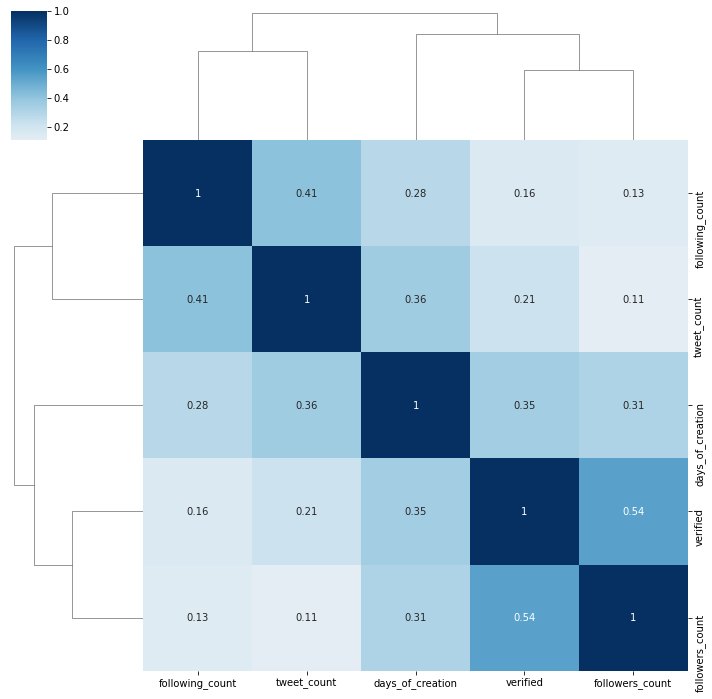

In [16]:
sns.clustermap(users.corr(numeric_only=True), annot=True, cmap='RdBu', center=0);

### Tweets

In [24]:
df['created_at'] = pd.to_datetime(df['created_at'].str[:19])

In [72]:
df['yearmonth'] = df['created_at'].dt.to_period('M')

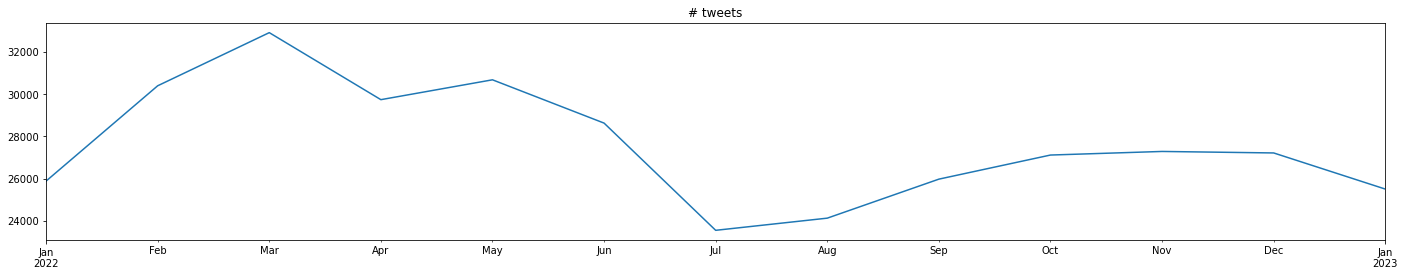

In [76]:
df['yearmonth'].value_counts().sort_index().plot(title='# tweets' ,figsize=(24, 4));

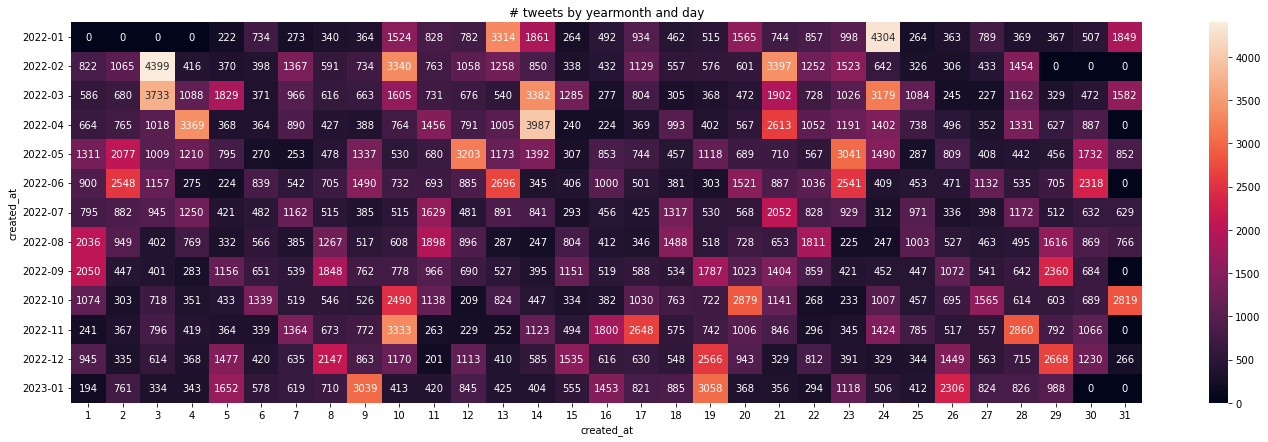

In [77]:
plt.figure(figsize=(24, 7))
plt.title('# tweets by yearmonth and day')
sns.heatmap(
    pd.crosstab(df['yearmonth'], df['created_at'].dt.day),
    annot=True, fmt='.5g');

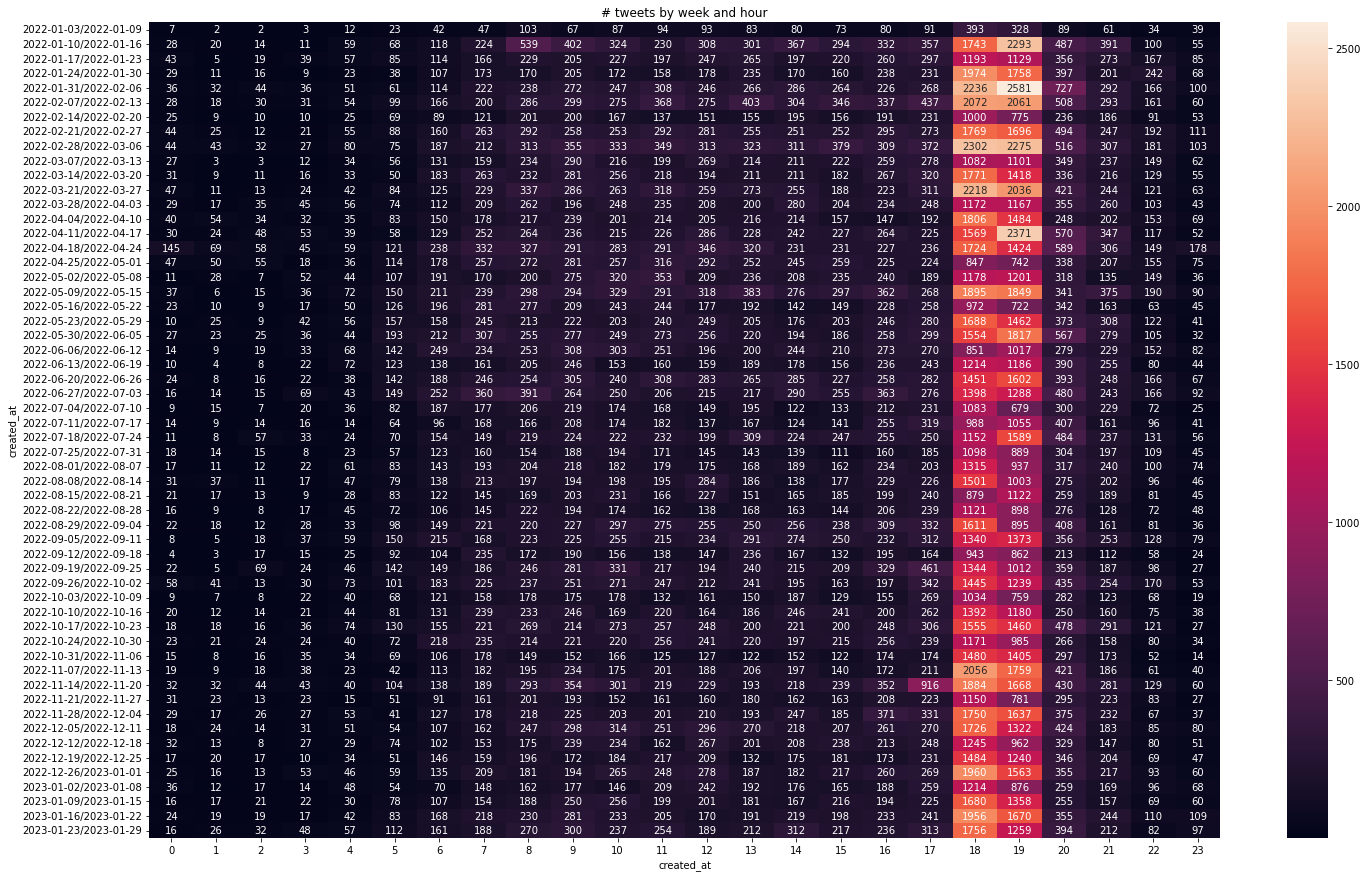

In [86]:
plt.figure(figsize=(24, 15))
plt.title('# tweets by week and hour')
sns.heatmap(
    pd.crosstab(df['created_at'].dt.to_period('W'), df['created_at'].dt.hour),
    annot=True, fmt='.5g');

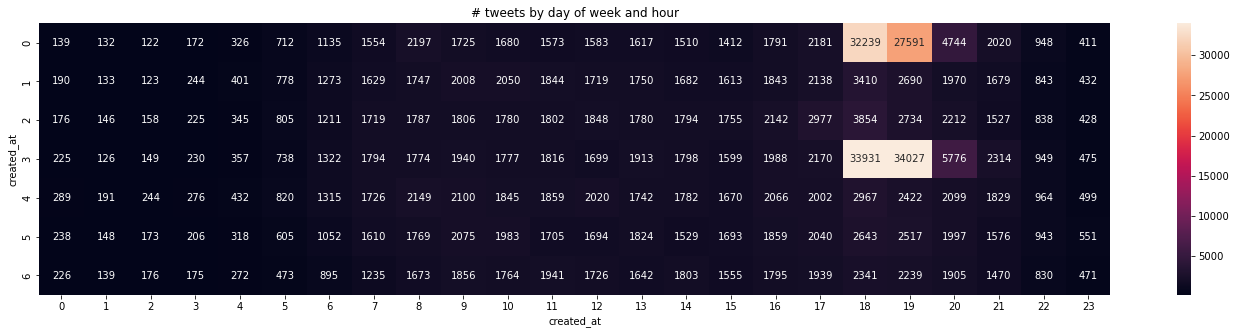

In [79]:
plt.figure(figsize=(24, 5))
plt.title('# tweets by day of week and hour')
sns.heatmap(
    pd.crosstab(df['created_at'].dt.dayofweek, df['created_at'].dt.hour),
    annot=True, fmt='.5g');

<AxesSubplot:title={'center':'Evolution of likes'}, xlabel='yearmonth', ylabel='like_count'>

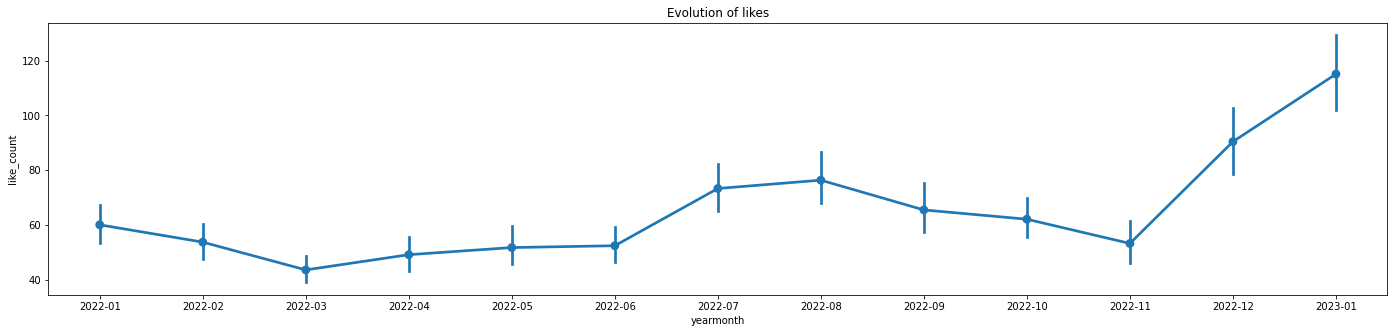

In [93]:
plt.figure(figsize=(24, 5))
plt.title('Evolution of likes')
sns.pointplot(data=df.sort_values('yearmonth'), x='yearmonth', y='like_count')

<AxesSubplot:title={'center':'Evolution of replies'}, xlabel='yearmonth', ylabel='reply_count'>

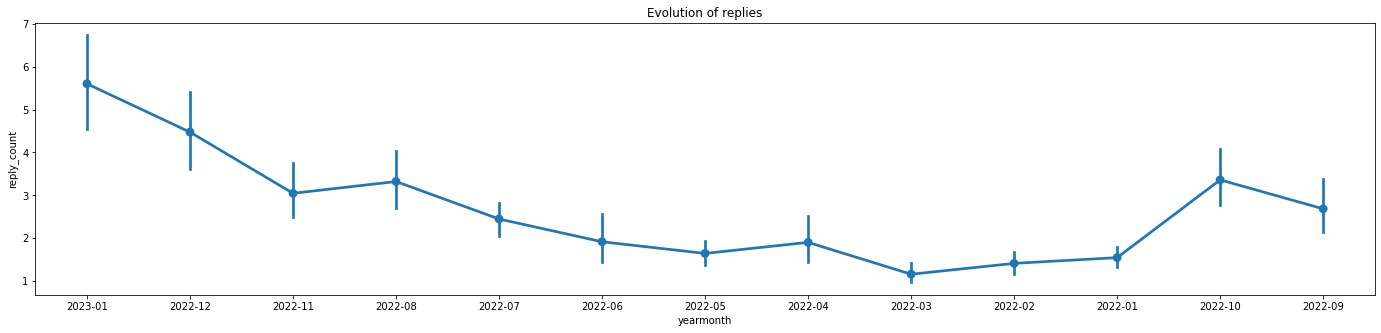

In [105]:
plt.figure(figsize=(24, 5))
plt.title('Evolution of replies')
sns.pointplot(data=df, x='yearmonth', y='reply_count')

<AxesSubplot:title={'center':'Evolution of retweets'}, xlabel='yearmonth', ylabel='retweet_count'>

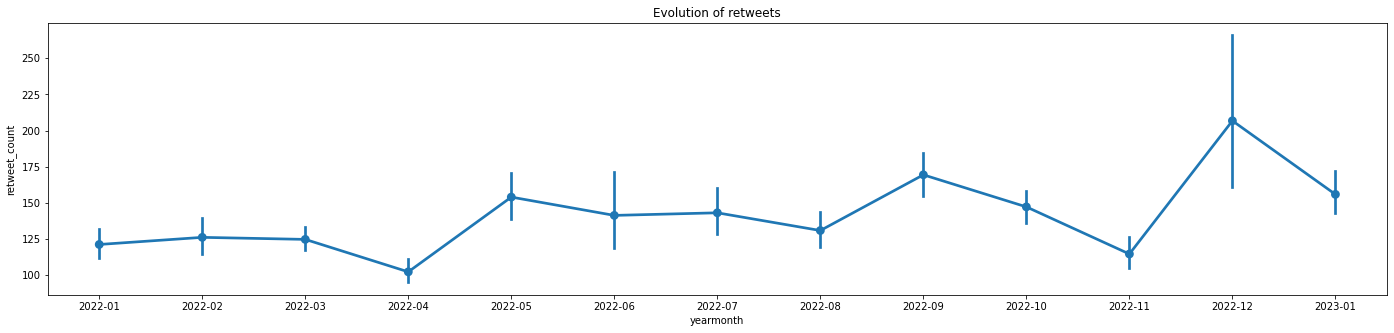

In [104]:
plt.figure(figsize=(24, 5))
plt.title('Evolution of retweets')
sns.pointplot(data=df.sort_values('yearmonth'), x='yearmonth', y='retweet_count')

<AxesSubplot:title={'center':'Evolution of impression count'}, xlabel='yearmonth', ylabel='impression_count'>

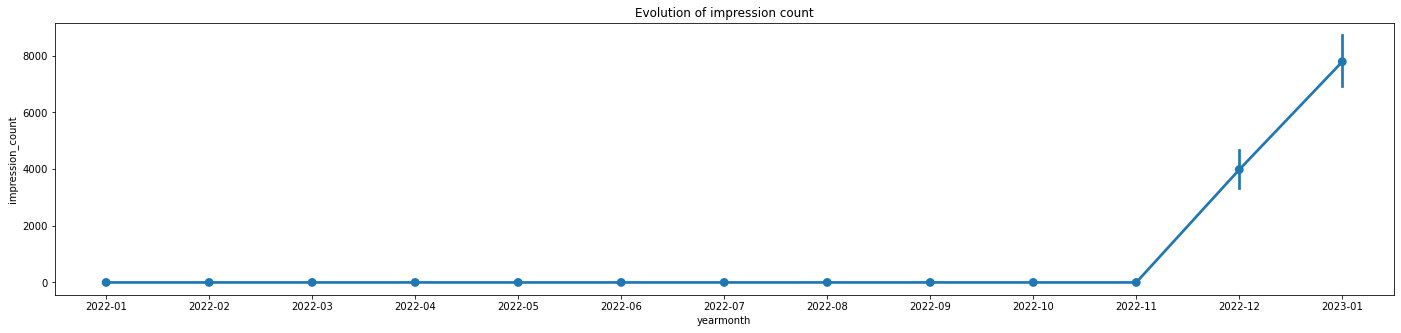

In [103]:
plt.figure(figsize=(24, 5))
plt.title('Evolution of impression count')
sns.pointplot(data=df.sort_values('yearmonth'), x='yearmonth', y='impression_count')

In [102]:
df[df['yearmonth'] < '2022-11']['impression_count'].unique()

array([0], dtype=int64)